Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


Loading the Data

In [ ]:
df = pd.read_csv('/content/avocado_ripeness_dataset.csv')
print(df.head())
print(df.info())


   firmness  hue  saturation  brightness color_category  sound_db  weight_g  \
0      14.5   19          40          26          black        34       175   
1      71.7   53          69          75          green        69       206   
2      88.5   60          94          46     dark green        79       220   
3      93.8  105          87          41     dark green        75       299   
4      42.5  303          58          32         purple        63       200   

   size_cm3         ripeness  
0       261             ripe  
1       185  pre-conditioned  
2       143             hard  
3       140             hard  
4       227         breaking  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brigh

Data Cleaning

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill missing values or drop rows with missing values
df.dropna(inplace=True)  # or df.fillna(method='ffill', inplace=True)


firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64


Exploratory Data Analysis (EDA)

In [ ]:
print(df.describe())
print(df['ripeness'].value_counts())  # Assuming 'ripeness' is a target or important feature


         firmness        hue  saturation  brightness    sound_db    weight_g  \
count  250.000000  250.00000  250.000000   250.00000  250.000000  250.000000   
mean    50.618400  125.94400   64.356000    45.07200   58.016000  220.188000   
std     27.277678  117.13767   17.377144    19.11629   13.838126   34.405225   
min     10.300000    1.00000   30.000000    10.00000   30.000000  152.000000   
25%     25.750000   25.25000   51.250000    31.00000   47.250000  193.250000   
50%     48.950000   77.00000   65.000000    46.00000   60.000000  220.000000   
75%     74.050000  278.75000   76.750000    58.00000   68.000000  245.000000   
max     98.800000  329.00000   99.000000    78.00000   79.000000  299.000000   

         size_cm3  
count  250.000000  
mean   208.644000  
std     55.940564  
min    100.000000  
25%    155.250000  
50%    218.000000  
75%    260.500000  
max    299.000000  
ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
fi

Data Visualization

 Histograms

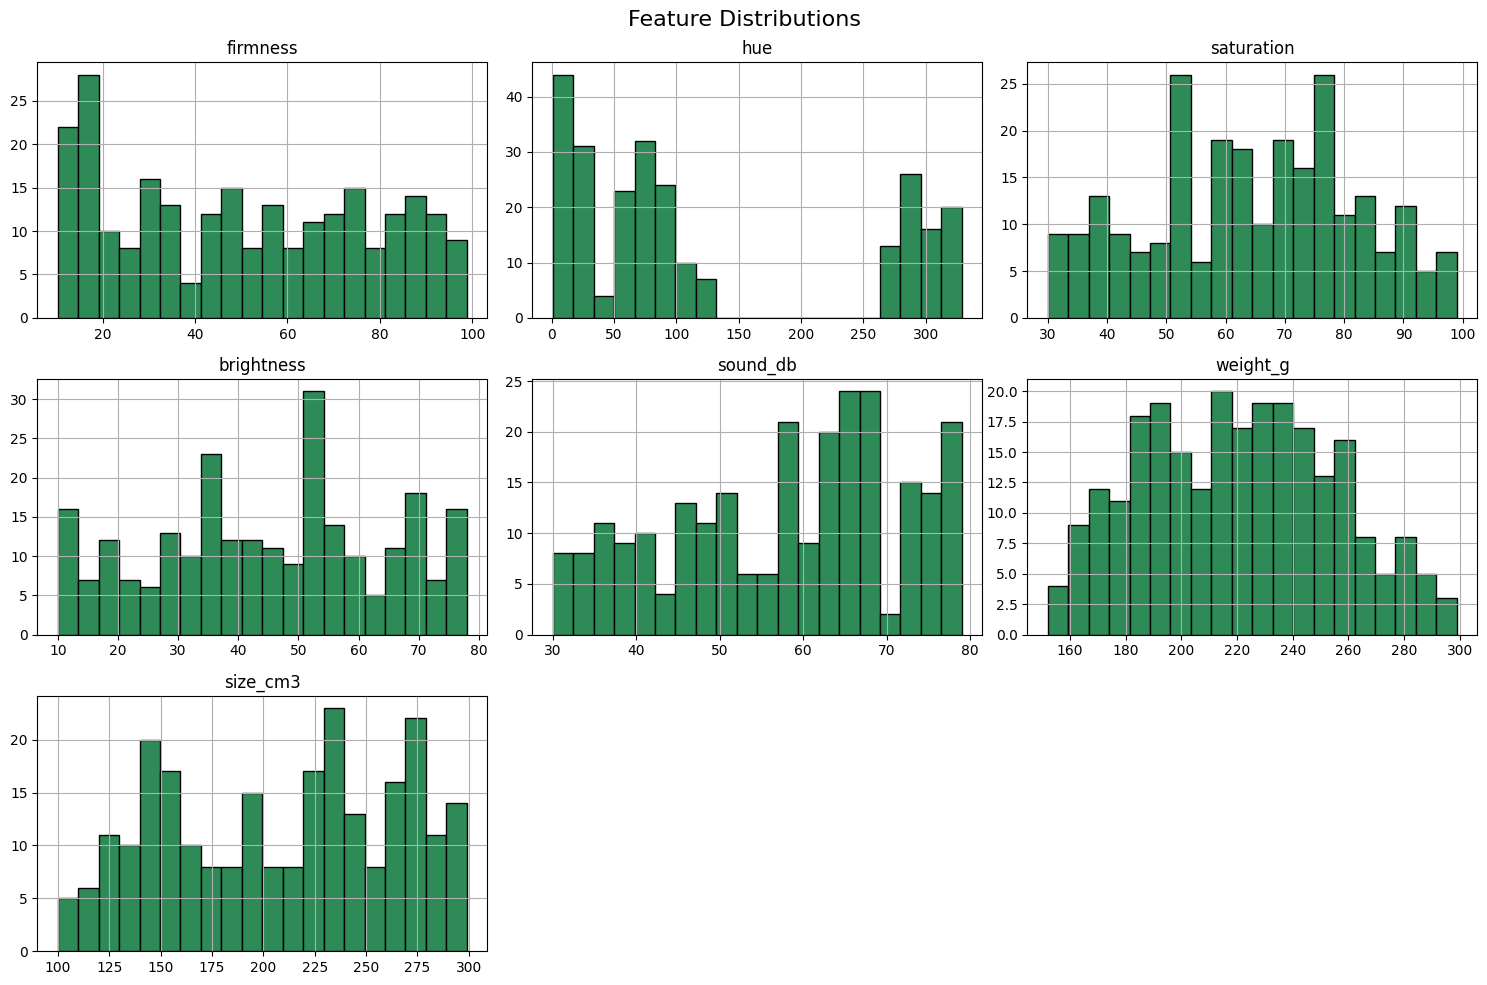

In [ ]:
df.hist(figsize=(15, 10), bins=20, color='seagreen', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


Pairplot (pairwise relationships between features)

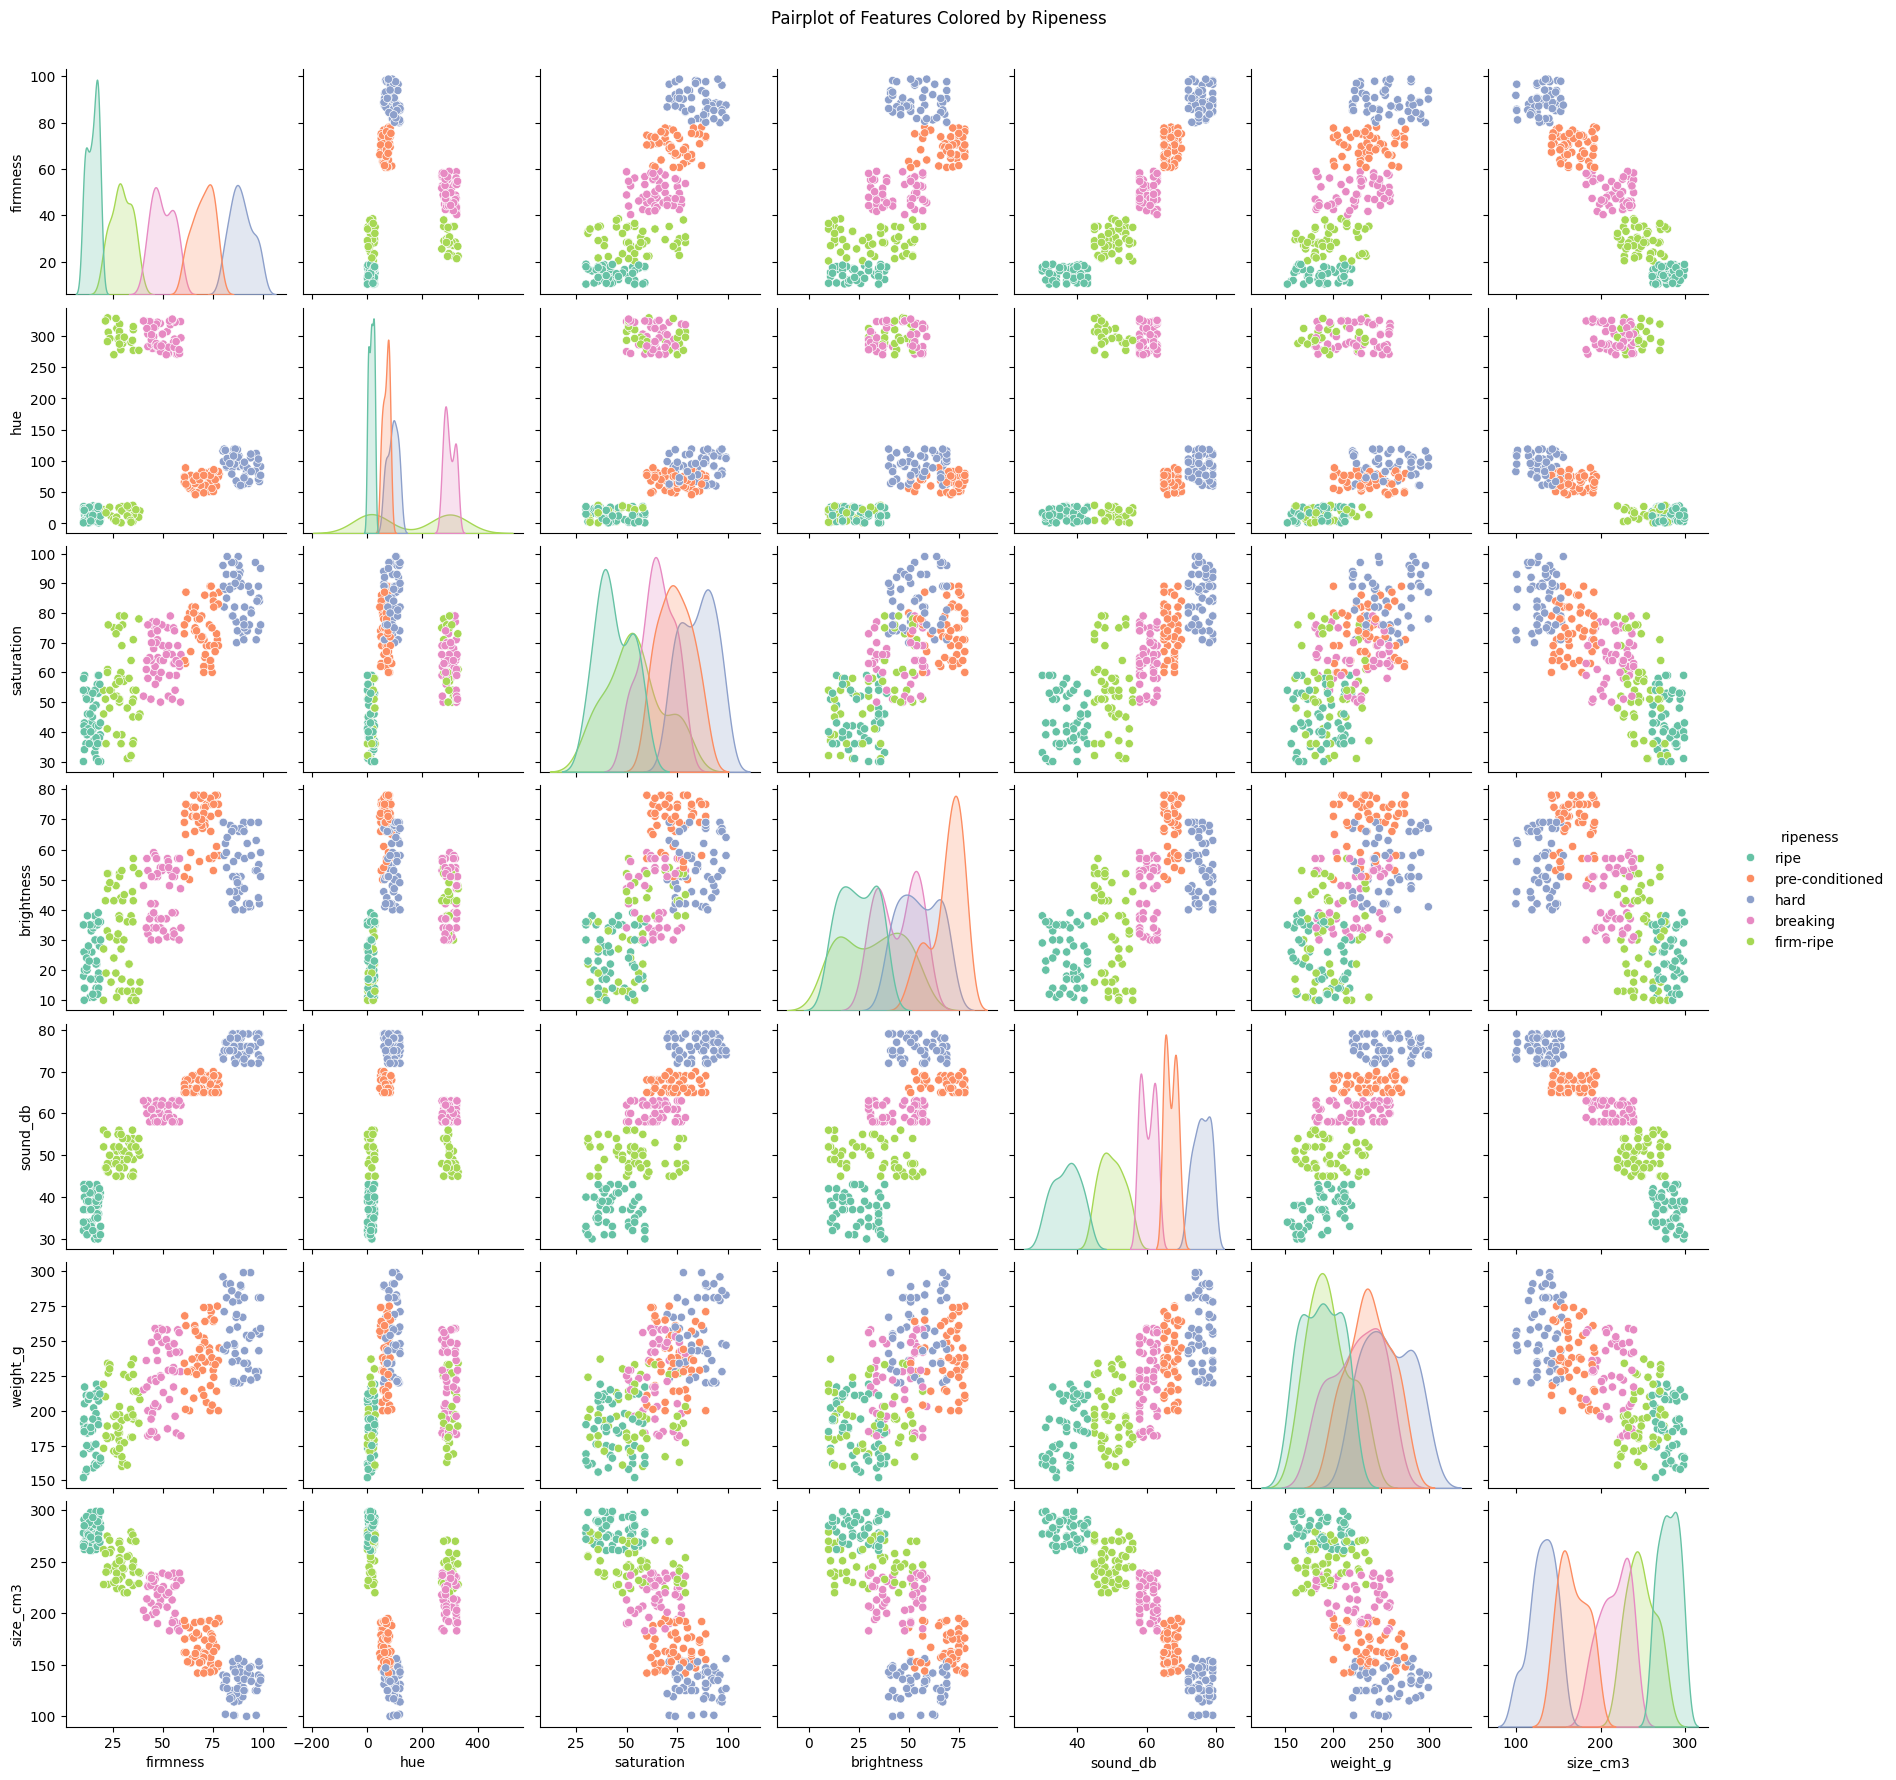

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='ripeness', palette='Set2')
plt.suptitle("Pairplot of Features Colored by Ripeness", y=1.02)
plt.show()


Countplot (for categorical features)

<ipython-input-16-7e9c072737f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ripeness', palette='Set3')


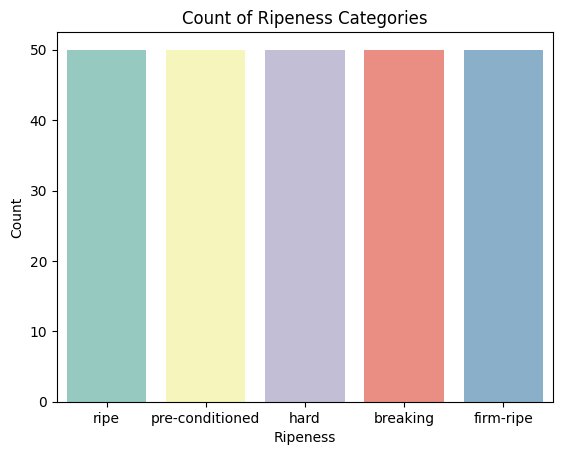

In [ ]:
sns.countplot(data=df, x='ripeness', palette='Set3')
plt.title("Count of Ripeness Categories")
plt.xlabel("Ripeness")
plt.ylabel("Count")
plt.show()


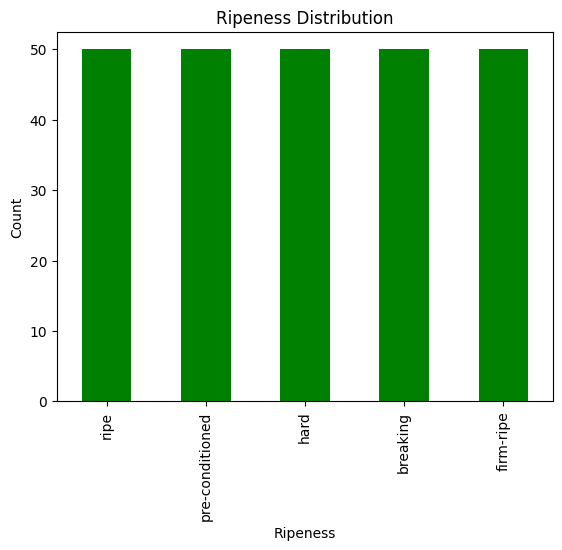

In [ ]:
# Distribution of ripeness
df['ripeness'].value_counts().plot(kind='bar', color='green')
plt.title("Ripeness Distribution")
plt.xlabel("Ripeness")
plt.ylabel("Count")
plt.show()




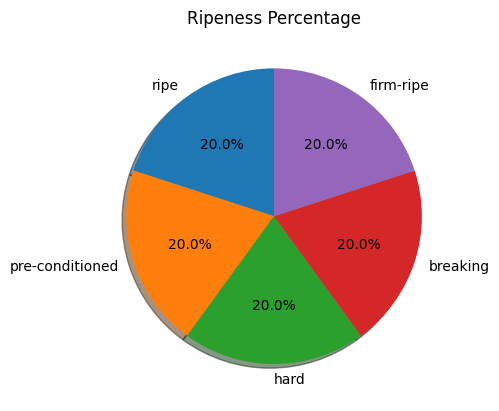

In [ ]:
# Pie chart for ripeness
df['ripeness'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Ripeness Percentage")
plt.ylabel("")  # Hides the default y-label
plt.show()


Correlation Between Features

In [ ]:
# Convert categorical columns if necessary
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

correlation = df.corr()
print(correlation)


                firmness       hue  saturation  brightness  color_category  \
firmness        1.000000  0.038071    0.807693    0.712119        0.257809   
hue             0.038071  1.000000    0.204663    0.172986        0.887604   
saturation      0.807693  0.204663    1.000000    0.681025        0.385482   
brightness      0.712119  0.172986    0.681025    1.000000        0.487529   
color_category  0.257809  0.887604    0.385482    0.487529        1.000000   
sound_db        0.951817  0.150709    0.803399    0.680530        0.351655   
weight_g        0.743636  0.077141    0.631171    0.557013        0.229911   
size_cm3       -0.943758 -0.035083   -0.808331   -0.707422       -0.250050   
ripeness       -0.151743 -0.790995   -0.177283   -0.019718       -0.645942   

                sound_db  weight_g  size_cm3  ripeness  
firmness        0.951817  0.743636 -0.943758 -0.151743  
hue             0.150709  0.077141 -0.035083 -0.790995  
saturation      0.803399  0.631171 -0.808331 -0.

Classification Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['ripeness'])  # Converts 'unripe', 'ripe' → 0, 1, 2


In [ ]:
X = df.drop('ripeness', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




In [ ]:
# Convert to strings
target_labels = [str(label) for label in le.classes_]

# Now use in classification report
print(classification_report(y_test, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



 Correlation Heatmap

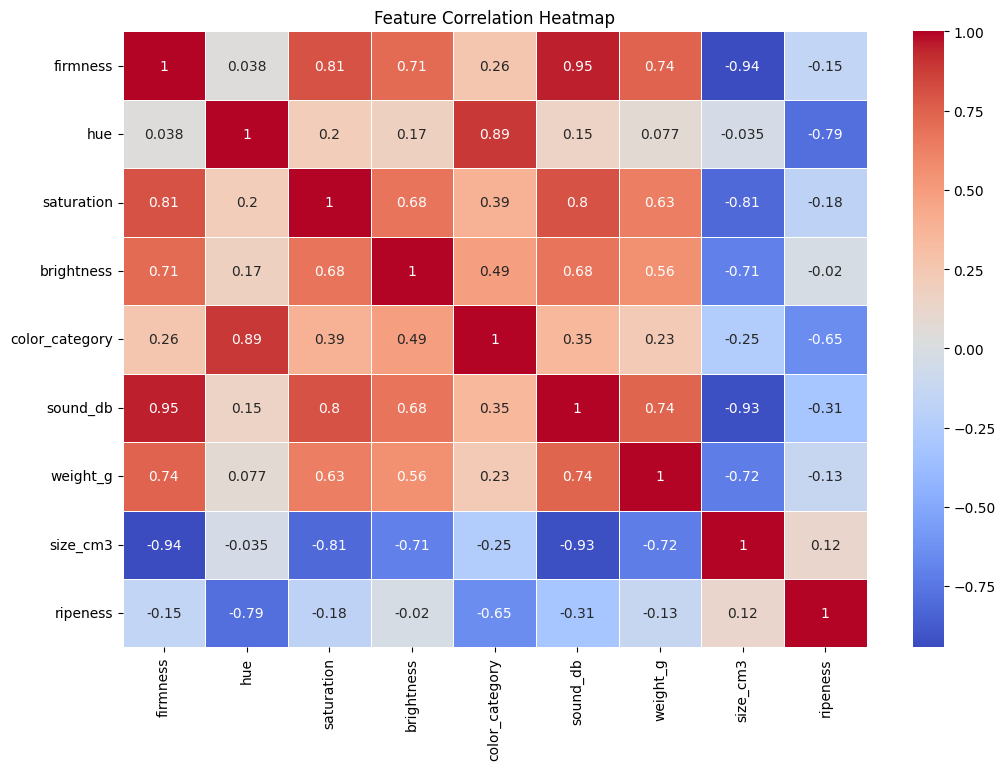

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Machine Learning

In [ ]:
X = df.drop('ripeness', axis=1)
y = df['ripeness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



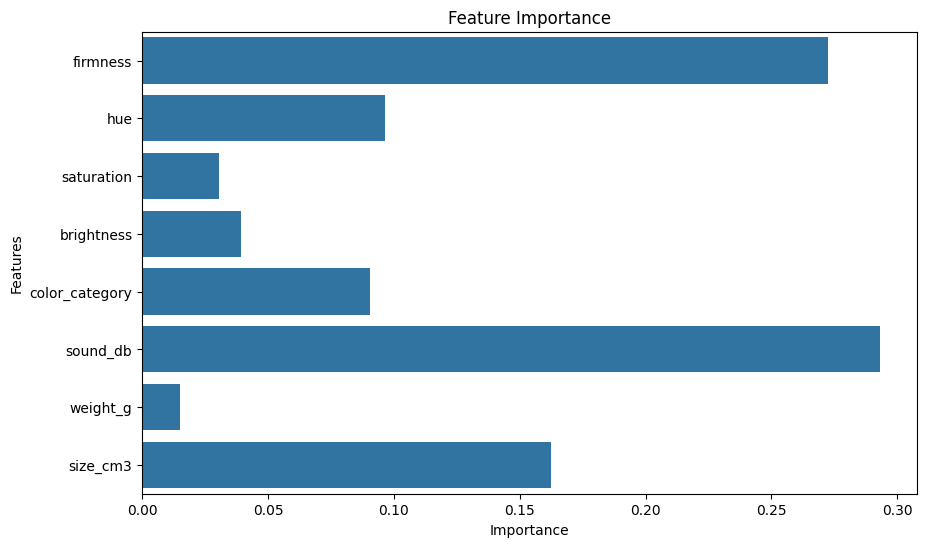

In [ ]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")


Model Accuracy on Test Set: 1.00


In [ ]:

import joblib
joblib.dump(model, '.pkl')


['.pkl']

In [ ]:
import joblib
import numpy as np

model = joblib.load("model.pkl")

def predict_ripeness(features):
    """
    features: list of numerical values matching model input features
    returns: ripeness class (e.g., 'ripe', 'unripe', etc.)
    """
    prediction = model.predict([features])
    return prediction[0]
